# Create a Web Application for an ETF Analyzer

In this Challenge assignment, you’ll build a financial database and web application by using SQL, Python, and the Voilà library to analyze the performance of a hypothetical fintech ETF.

Instructions: 

Use this notebook to complete your analysis of a fintech ETF that consists of four stocks: GOST, GS, PYPL, and SQ. Each stock has its own table in the `etf.db` database, which the `Starter_Code` folder also contains.

Analyze the daily returns of the ETF stocks both individually and as a whole. Then deploy the visualizations to a web application by using the Voilà library.

The detailed instructions are divided into the following parts:

* Analyze a single asset in the ETF

* Optimize data access with Advanced SQL queries

* Analyze the ETF portfolio

* Deploy the notebook as a web application

#### Analyze a Single Asset in the ETF

For this part of the assignment, you’ll use SQL queries with Python, Pandas, and hvPlot to analyze the performance of a single asset from the ETF.

Complete the following steps:

1. Write a SQL `SELECT` statement by using an f-string that reads all the PYPL data from the database. Using the SQL `SELECT` statement, execute a query that reads the PYPL data from the database into a Pandas DataFrame.

2. Use the `head` and `tail` functions to review the first five and the last five rows of the DataFrame. Make a note of the beginning and end dates that are available from this dataset. You’ll use this information to complete your analysis.

3. Using hvPlot, create an interactive visualization for the PYPL daily returns. Reflect the “time” column of the DataFrame on the x-axis. Make sure that you professionally style and format your visualization to enhance its readability.

4. Using hvPlot, create an interactive visualization for the PYPL cumulative returns. Reflect the “time” column of the DataFrame on the x-axis. Make sure that you professionally style and format your visualization to enhance its readability.

#### Optimize Data Access with Advanced SQL Queries

For this part of the assignment, you’ll continue to analyze a single asset (PYPL) from the ETF. You’ll use advanced SQL queries to optimize the efficiency of accessing data from the database.

Complete the following steps:

1. Access the closing prices for PYPL that are greater than 200 by completing the following steps:

    - Write a SQL `SELECT` statement to select the dates where the PYPL closing price was higher than 200.0.

    - Using the SQL statement, read the data from the database into a Pandas DataFrame, and then review the resulting DataFrame.

    - Select the “time” and “close” columns for those dates where the closing price was higher than 200.0.

2. Find the top 10 daily returns for PYPL by completing the following steps:

    -  Write a SQL statement to find the top 10 PYPL daily returns. Make sure to do the following:

        * Use `SELECT` to select only the “time” and “daily_returns” columns.

        * Use `ORDER` to sort the results in descending order by the “daily_returns” column.

        * Use `LIMIT` to limit the results to the top 10 daily return values.

    - Using the SQL statement, read the data from the database into a Pandas DataFrame, and then review the resulting DataFrame.

#### Analyze the ETF Portfolio

For this part of the assignment, you’ll build the entire ETF portfolio and then evaluate its performance. To do so, you’ll build the ETF portfolio by using SQL joins to combine all the data for each asset.

Complete the following steps:

1. Write a SQL query to join each table in the portfolio into a single DataFrame. To do so, complete the following steps:

    - Use a SQL inner join to join each table on the “time” column. Access the “time” column in the `GDOT` table via the `GDOT.time` syntax. Access the “time” columns from the other tables via similar syntax.

    - Using the SQL query, read the data from the database into a Pandas DataFrame. Review the resulting DataFrame.

2. Create a DataFrame that averages the “daily_returns” columns for all four assets. Review the resulting DataFrame.

    > **Hint** Assuming that this ETF contains equally weighted returns, you can average the returns for each asset to get the average returns of the portfolio. You can then use the average returns of the portfolio to calculate the annualized returns and the cumulative returns. For the calculation to get the average daily returns for the portfolio, use the following code:
    >
    > ```python
    > etf_portfolio_returns = etf_portfolio['daily_returns'].mean(axis=1)
    > ```
    >
    > You can use the average daily returns of the portfolio the same way that you used the daily returns of a single asset.

3. Use the average daily returns in the `etf_portfolio_returns` DataFrame to calculate the annualized returns for the portfolio. Display the annualized return value of the ETF portfolio.

> **Hint**  To calculate the annualized returns, multiply the mean of the `etf_portfolio_returns` values by 252.
>
> To convert the decimal values to percentages, multiply the results by 100.

4. Use the average daily returns in the `etf_portfolio_returns` DataFrame to calculate the cumulative returns of the ETF portfolio.

5. Using hvPlot, create an interactive line plot that visualizes the cumulative return values of the ETF portfolio. Reflect the “time” column of the DataFrame on the x-axis. Make sure that you professionally style and format your visualization to enhance its readability.

#### Deploy the Notebook as a Web Application

For this part of the assignment, complete the following steps:

1. Use the Voilà library to deploy your notebook as a web application. You can deploy the web application locally on your computer.

2. Take a screen recording or screenshots to show how the web application appears when using Voilà. Include the recording or screenshots in the `README.md` file for your GitHub repository.


## Review the following code which imports the required libraries, initiates your SQLite database, popluates the database with records from the `etf.db` seed file that was included in your Starter_Code folder, creates the database engine, and confirms that data tables that it now contains.

In [2]:
# Importing the required libraries and dependencies
import numpy as np
import pandas as pd
import hvplot.pandas
import sqlalchemy

# Create a temporary SQLite database and populate the database with content from the etf.db seed file
database_connection_string = 'sqlite:///etf.db'

# Create an engine to interact with the SQLite database
engine = sqlalchemy.create_engine(database_connection_string)

# Confirm that table names contained in the SQLite database.
engine.table_names()

C:\Users\Owner\AppData\Local\Temp\ipykernel_10844\3092246052.py:14: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['GDOT', 'GS', 'PYPL', 'SQ']

## Analyze a single asset in the FinTech ETF

For this part of the assignment, you’ll use SQL queries with Python, Pandas, and hvPlot to analyze the performance of a single asset from the ETF.

Complete the following steps:

1. Write a SQL `SELECT` statement by using an f-string that reads all the PYPL data from the database. Using the SQL `SELECT` statement, execute a query that reads the PYPL data from the database into a Pandas DataFrame.

2. Use the `head` and `tail` functions to review the first five and the last five rows of the DataFrame. Make a note of the beginning and end dates that are available from this dataset. You’ll use this information to complete your analysis.

3. Using hvPlot, create an interactive visualization for the PYPL daily returns. Reflect the “time” column of the DataFrame on the x-axis. Make sure that you professionally style and format your visualization to enhance its readability.

4. Using hvPlot, create an interactive visualization for the PYPL cumulative returns. Reflect the “time” column of the DataFrame on the x-axis. Make sure that you professionally style and format your visualization to enhance its readability.



### Step 1: Write a SQL `SELECT` statement by using an f-string that reads all the PYPL data from the database. Using the SQL `SELECT` statement, execute a query that reads the PYPL data from the database into a Pandas DataFrame.

In [3]:
# Write a SQL query to SELECT all of the data from the PYPL table
query = f"SELECT * FROM PYPL"

# Use the query to read the PYPL data into a Pandas DataFrame
pypl_dataframe = pd.read_sql(query, engine)

### Step 2: Use the `head` and `tail` functions to review the first five and the last five rows of the DataFrame. Make a note of the beginning and end dates that are available from this dataset. You’ll use this information to complete your analysis.

In [4]:
# View the first 5 rows of the DataFrame.
# YOUR CODE HERE
display(pypl_dataframe.head(5))

,time,open,high,low,close,volume,daily_returns
0,2016-12-16 00:00:00.000000,39.90,39.90,39.12,39.32,7298861,-0.005564
1,2016-12-19 00:00:00.000000,39.40,39.80,39.11,39.45,3436478,0.003306
2,2016-12-20 00:00:00.000000,39.61,39.74,39.26,39.74,2940991,0.007351
3,2016-12-21 00:00:00.000000,39.84,40.74,39.82,40.09,5826704,0.008807
4,2016-12-22 00:00:00.000000,40.04,40.09,39.54,39.68,4338385,-0.010227


In [5]:
# View the last 5 rows of the DataFrame.
# YOUR CODE HERE
display(pypl_dataframe.tail(5))

,time,open,high,low,close,volume,daily_returns
994,2020-11-30 00:00:00.000000,212.51,215.83,207.0900,214.200,8992681,0.013629
995,2020-12-01 00:00:00.000000,217.15,220.57,214.3401,216.520,9148174,0.010831
996,2020-12-02 00:00:00.000000,215.60,215.75,210.5000,212.660,6414746,-0.017827
997,2020-12-03 00:00:00.000000,213.33,216.93,213.1100,214.680,6463339,0.009499
998,2020-12-04 00:00:00.000000,214.88,217.28,213.0100,217.235,2118319,0.011901


In [6]:
pypl_dataframe["time"].dtype

dtype('O')

In [7]:
pypl_dataframe["time"] = pd.to_datetime(pypl_dataframe["time"])

In [8]:
pypl_dataframe["time"].dtype

dtype('<M8[ns]')

### Step 3: Using hvPlot, create an interactive visualization for the PYPL daily returns. Reflect the “time” column of the DataFrame on the x-axis. Make sure that you professionally style and format your visualization to enhance its readability.

In [9]:
# Create an interactive visualization with hvplot to plot the daily returns for PYPL
pypl_dataframe.hvplot(x = "time", y = "daily_returns", title = "PYPL Daily Returns",
                     height = 800, width = 800, rot = 45)

:Curve   [time]   (daily_returns)

In [10]:
"27" + "1" # i.e., your credit card#, zip code and phone number are all added as string; not as integar

'271'

### Step 4: Using hvPlot, create an interactive visualization for the PYPL cumulative returns. Reflect the “time” column of the DataFrame on the x-axis. Make sure that you professionally style and format your visualization to enhance its readability.

In [11]:
# Create an interactive visaulization with hvplot to plot the cumulative returns for PYPL.
pypl_dataframe['cumulative_returns'] = (1 + pypl_dataframe['daily_returns']).cumprod()
pypl_dataframe

,time,open,high,low,close,volume,daily_returns,cumulative_returns
0,2016-12-16,39.90,39.90,39.1200,39.320,7298861,-0.005564,0.994436
1,2016-12-19,39.40,39.80,39.1100,39.450,3436478,0.003306,0.997724
2,2016-12-20,39.61,39.74,39.2600,39.740,2940991,0.007351,1.005058
3,2016-12-21,39.84,40.74,39.8200,40.090,5826704,0.008807,1.013910
4,2016-12-22,40.04,40.09,39.5400,39.680,4338385,-0.010227,1.003541
...,...,...,...,...,...,...,...,...
994,2020-11-30,212.51,215.83,207.0900,214.200,8992681,0.013629,5.417299
995,2020-12-01,217.15,220.57,214.3401,216.520,9148174,0.010831,5.475974
996,2020-12-02,215.60,215.75,210.5000,212.660,6414746,-0.017827,5.378351
997,2020-12-03,213.33,216.93,213.1100,214.680,6463339,0.009499,5.429439


In [12]:
cumulative_returns_plot = pypl_dataframe.hvplot.line(x='time', y='cumulative_returns', title='PYPL Cumulative Returns', 
                                                     xlabel='Date', ylabel='Cumulative Returns', 
                                                     width=800, height=400)
cumulative_returns_plot

:Curve   [time]   (cumulative_returns)

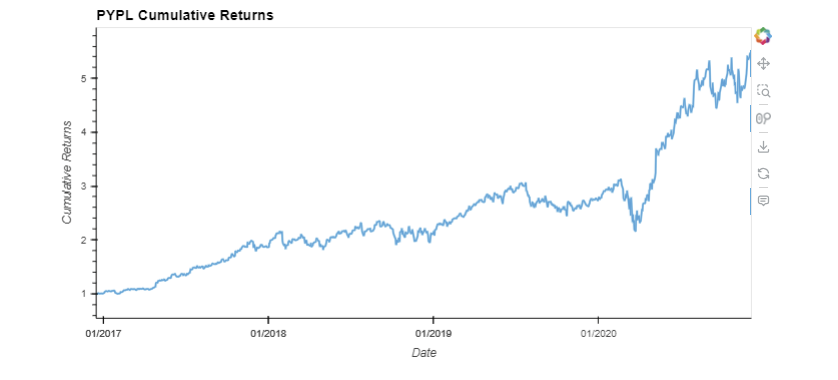

## Optimize the SQL Queries

For this part of the assignment, you’ll continue to analyze a single asset (PYPL) from the ETF. You’ll use advanced SQL queries to optimize the efficiency of accessing data from the database.

Complete the following steps:

1. Access the closing prices for PYPL that are greater than 200 by completing the following steps:

1. Access the closing prices for PYPL that are greater than 200 by completing the following steps:

    - Write a SQL `SELECT` statement to select the dates where the PYPL closing price was higher than 200.0.

    - Select the “time” and “close” columns for those dates where the closing price was higher than 200.0.

    - Using the SQL statement, read the data from the database into a Pandas DataFrame, and then review the resulting DataFrame.

2. Find the top 10 daily returns for PYPL by completing the following steps:

    -  Write a SQL statement to find the top 10 PYPL daily returns. Make sure to do the following:

        * Use `SELECT` to select only the “time” and “daily_returns” columns.

        * Use `ORDER` to sort the results in descending order by the “daily_returns” column.

        * Use `LIMIT` to limit the results to the top 10 daily return values.

    - Using the SQL statement, read the data from the database into a Pandas DataFrame, and then review the resulting DataFrame.


### Step 1: Access the closing prices for PYPL that are greater than 200 by completing the following steps:

    - Write a SQL `SELECT` statement to select the dates where the PYPL closing price was higher than 200.0.

    - Select the “time” and “close” columns for those dates where the closing price was higher than 200.0.

    - Using the SQL statement, read the data from the database into a Pandas DataFrame, and then review the resulting DataFrame.


In [13]:
pypl_dataframe

,time,open,high,low,close,volume,daily_returns,cumulative_returns
0,2016-12-16,39.90,39.90,39.1200,39.320,7298861,-0.005564,0.994436
1,2016-12-19,39.40,39.80,39.1100,39.450,3436478,0.003306,0.997724
2,2016-12-20,39.61,39.74,39.2600,39.740,2940991,0.007351,1.005058
3,2016-12-21,39.84,40.74,39.8200,40.090,5826704,0.008807,1.013910
4,2016-12-22,40.04,40.09,39.5400,39.680,4338385,-0.010227,1.003541
...,...,...,...,...,...,...,...,...
994,2020-11-30,212.51,215.83,207.0900,214.200,8992681,0.013629,5.417299
995,2020-12-01,217.15,220.57,214.3401,216.520,9148174,0.010831,5.475974
996,2020-12-02,215.60,215.75,210.5000,212.660,6414746,-0.017827,5.378351
997,2020-12-03,213.33,216.93,213.1100,214.680,6463339,0.009499,5.429439


In [14]:
# Write a SQL SELECT statement to select the time and close columns 
# where the PYPL closing price was higher than 200.0.
query = """SELECT time, close FROM PYPL WHERE close > 200.0;"""

# Using the query, read the data from the database into a Pandas DataFrame
pypl_higher_than_200 = pypl_higher_than_200 = pd.read_sql(query, con=engine)

# Review the resulting DataFrame
display(pypl_higher_than_200.head())

,time,close
0,2020-08-05 00:00:00.000000,202.92
1,2020-08-06 00:00:00.000000,204.09
2,2020-08-25 00:00:00.000000,201.71
3,2020-08-26 00:00:00.000000,203.53
4,2020-08-27 00:00:00.000000,204.34


In [15]:
# Write a SQL SELECT statement to select the time and daily_returns columns
# Sort the results in descending order and return only the top 10 return values
query = """SELECT time, daily_returns FROM PYPL
ORDER BY daily_returns DESC
limit 10;"""

# Using the query, read the data from the database into a Pandas DataFrame
pypl_top_10_returns = pd.read_sql(query, engine)

# Review the resulting DataFrame
# YOUR CODE HERE
pypl_top_10_returns

,time,daily_returns
0,2020-03-24 00:00:00.000000,0.140981
1,2020-05-07 00:00:00.000000,0.140318
2,2020-03-13 00:00:00.000000,0.138700
3,2020-04-06 00:00:00.000000,0.100877
4,2018-10-19 00:00:00.000000,0.093371
5,2019-10-24 00:00:00.000000,0.085912
6,2020-11-04 00:00:00.000000,0.080986
7,2020-03-10 00:00:00.000000,0.080863
8,2020-04-22 00:00:00.000000,0.075321
9,2018-12-26 00:00:00.000000,0.074656


## Analyze the Fintech ETF Portfolio

For this part of the assignment, you’ll build the entire ETF portfolio and then evaluate its performance. To do so, you’ll build the ETF portfolio by using SQL joins to combine all the data for each asset.

Complete the following steps:

1. Write a SQL query to join each table in the portfolio into a single DataFrame. To do so, complete the following steps:

    - Use a SQL inner join to join each table on the “time” column. Access the “time” column in the `GDOT` table via the `GDOT.time` syntax. Access the “time” columns from the other tables via similar syntax.

    - Using the SQL query, read the data from the database into a Pandas DataFrame. Review the resulting DataFrame.

2. Create a DataFrame that averages the “daily_returns” columns for all four assets. Review the resulting DataFrame.

    > **Hint** Assuming that this ETF contains equally weighted returns, you can average the returns for each asset to get the average returns of the portfolio. You can then use the average returns of the portfolio to calculate the annualized returns and the cumulative returns. For the calculation to get the average daily returns for the portfolio, use the following code:
    >
    > ```python
    > etf_portfolio_returns = etf_portfolio['daily_returns'].mean(axis=1)
    > ```
    >
    > You can use the average daily returns of the portfolio the same way that you used the daily returns of a single asset.

3. Use the average daily returns in the `etf_portfolio_returns` DataFrame to calculate the annualized returns for the portfolio. Display the annualized return value of the ETF portfolio.

> **Hint**  To calculate the annualized returns, multiply the mean of the `etf_portfolio_returns` values by 252.
>
> To convert the decimal values to percentages, multiply the results by 100.

4. Use the average daily returns in the `etf_portfolio_returns` DataFrame to calculate the cumulative returns of the ETF portfolio.

5. Using hvPlot, create an interactive line plot that visualizes the cumulative return values of the ETF portfolio. Reflect the “time” column of the DataFrame on the x-axis. Make sure that you professionally style and format your visualization to enhance its readability.


### Step 1: Write a SQL query to join each table in the portfolio into a single DataFrame. To do so, complete the following steps:

    - Use a SQL inner join to join each table on the “time” column. Access the “time” column in the `GDOT` table via the `GDOT.time` syntax. Access the “time” columns from the other tables via similar syntax.

    - Using the SQL query, read the data from the database into a Pandas DataFrame. Review the resulting DataFrame.

In [22]:
# Write a SQL query to join each table in the portfolio into a single DataFrame 
# Use the time column from each table as the basis for the join
query = """
SELECT PYPL.time, PYPL.close AS pypl_close, SQ.close AS SQ_close, GS.close AS GS_close, GDOT.close AS GDOT_close
FROM PYPL
JOIN SQ ON PYPL.time = SQ.time
JOIN GS ON GS.time = SQ.time
JOIN GDOT ON GDOT.time = GS.time;
"""


# Using the query, read the data from the database into a Pandas DataFrame
etf_portfolio = pd.read_sql(query, con=engine)

# Review the resulting DataFrame
etf_portfolio

,time,pypl_close,SQ_close,GS_close,GDOT_close
0,2016-12-16 00:00:00.000000,39.320,14.3750,238.94,23.980
1,2016-12-19 00:00:00.000000,39.450,14.3600,239.13,23.790
2,2016-12-20 00:00:00.000000,39.740,14.4900,243.10,23.820
3,2016-12-21 00:00:00.000000,40.090,14.3800,241.42,23.860
4,2016-12-22 00:00:00.000000,39.680,14.0400,240.17,24.005
...,...,...,...,...,...
994,2020-11-30 00:00:00.000000,214.200,210.9800,230.58,53.550
995,2020-12-01 00:00:00.000000,216.520,203.0000,232.09,53.790
996,2020-12-02 00:00:00.000000,212.660,202.1100,237.75,52.320
997,2020-12-03 00:00:00.000000,214.680,205.5300,235.62,53.760


### Step 2: Create a DataFrame that averages the “daily_returns” columns for all four assets. Review the resulting DataFrame.

In [17]:
# Create a DataFrame that displays the mean value of the “daily_returns” columns for all four assets.
# etf_portfolio_returns = etf_portfolio.iloc[:, "1,2,3,4"].daily_returns()
etf_portfolio['pypl_daily_returns'] = etf_portfolio['pypl_close'].pct_change()
etf_portfolio['SQ_daily_returns'] = etf_portfolio['SQ_close'].pct_change()
etf_portfolio['GS_daily_returns'] = etf_portfolio['GS_close'].pct_change()
etf_portfolio['GDOT_daily_returns'] = etf_portfolio['GDOT_close'].pct_change()

etf_portfolio_returns = etf_portfolio[['pypl_daily_returns', 'SQ_daily_returns', 'GS_daily_returns', 'GDOT_daily_returns']].mean()

# Review the resulting DataFrame
print(etf_portfolio_returns)

pypl_daily_returns    0.001965
SQ_daily_returns      0.003286
GS_daily_returns      0.000212
GDOT_daily_returns    0.001528
dtype: float64


In [28]:
etf_portfolio_returns = etf_portfolio.set_index("time").pct_change()

In [29]:
etf_portfolio_returns

,pypl_close,SQ_close,GS_close,GDOT_close
time,,,,
2016-12-16 00:00:00.000000,NaN,NaN,NaN,NaN
2016-12-19 00:00:00.000000,0.003306,-0.001043,0.000795,-0.007923
2016-12-20 00:00:00.000000,0.007351,0.009053,0.016602,0.001261
2016-12-21 00:00:00.000000,0.008807,-0.007591,-0.006911,0.001679
2016-12-22 00:00:00.000000,-0.010227,-0.023644,-0.005178,0.006077
...,...,...,...,...
2020-11-30 00:00:00.000000,0.013629,-0.007153,-0.021266,-0.043750
2020-12-01 00:00:00.000000,0.010831,-0.037823,0.006549,0.004482
2020-12-02 00:00:00.000000,-0.017827,-0.004384,0.024387,-0.027328


In [38]:
etf_portfolio_returns = etf_portfolio_returns.mean(axis = "rows")

In [36]:
etf_portfolio_returns.cumsum(axis = "columns")

,pypl_close,SQ_close,GS_close,GDOT_close
time,,,,
2016-12-16 00:00:00.000000,NaN,NaN,NaN,NaN
2016-12-19 00:00:00.000000,0.003306,0.002263,0.003058,-0.004865
2016-12-20 00:00:00.000000,0.007351,0.016404,0.033006,0.034267
2016-12-21 00:00:00.000000,0.008807,0.001216,-0.005695,-0.004016
2016-12-22 00:00:00.000000,-0.010227,-0.033871,-0.039049,-0.032972
...,...,...,...,...
2020-11-30 00:00:00.000000,0.013629,0.006476,-0.014790,-0.058540
2020-12-01 00:00:00.000000,0.010831,-0.026992,-0.020444,-0.015962
2020-12-02 00:00:00.000000,-0.017827,-0.022212,0.002175,-0.025153


In [33]:
etf_portfolio_returns.mean(axis = "columns")

time
2016-12-16 00:00:00.000000         NaN
2016-12-19 00:00:00.000000   -0.001216
2016-12-20 00:00:00.000000    0.008567
2016-12-21 00:00:00.000000   -0.001004
2016-12-22 00:00:00.000000   -0.008243
                                ...   
2020-11-30 00:00:00.000000   -0.014635
2020-12-01 00:00:00.000000   -0.003990
2020-12-02 00:00:00.000000   -0.006288
2020-12-03 00:00:00.000000    0.011246
2020-12-04 00:00:00.000000    0.009108
Length: 999, dtype: float64

### Step 3: Use the average daily returns in the etf_portfolio_returns DataFrame to calculate the annualized returns for the portfolio. Display the annualized return value of the ETF portfolio.

In [40]:
# Use the average daily returns provided by the etf_portfolio_returns DataFrame 
# to calculate the annualized return for the portfolio. 
annualized_etf_portfolio_returns = (1 + etf_portfolio_returns) ** 252 - 1

# Display the annualized return value of the ETF portfolio.
print(annualized_etf_portfolio_returns)

pypl_close    0.639897
SQ_close      1.285888
GS_close      0.055003
GDOT_close    0.469440
dtype: float64


### Step 4: Use the average daily returns in the `etf_portfolio_returns` DataFrame to calculate the cumulative returns of the ETF portfolio.

In [20]:
# Step 1: Define the number of trading days in a year
n = 252

# Step 2: Calculate the cumulative return for each asset
etf_cumulative_returns = (1 + etf_portfolio_returns) ** n - 1

# Step 3: Display the cumulative returns
print(etf_cumulative_returns)

pypl_daily_returns    0.639897
SQ_daily_returns      1.285888
GS_daily_returns      0.055003
GDOT_daily_returns    0.469440
dtype: float64


### Step 5: Using hvPlot, create an interactive line plot that visualizes the cumulative return values of the ETF portfolio. Reflect the “time” column of the DataFrame on the x-axis. Make sure that you professionally style and format your visualization to enhance its readability.

In [21]:
# Using hvplot, create an interactive line plot that visualizes the ETF portfolios cumulative return values.
# YOUR CODE HERE
etf_cumulative_returns.hvplot()

:Curve   [index]   (0)

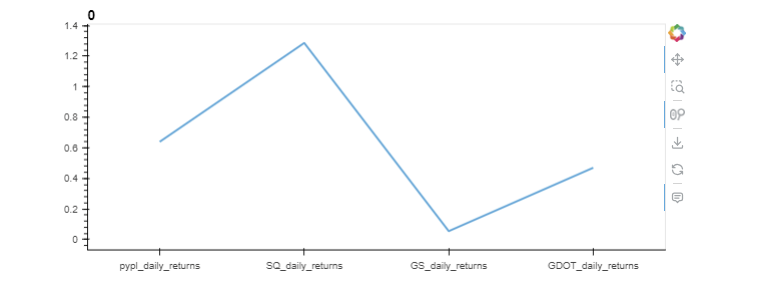

In [41]:
etf_portfolio_returns2 = etf_portfolio.set_index("time").pct_change()

In [44]:
etf_portfolio_returns2 = etf_portfolio_returns2.mean(axis = "columns")

In [45]:
etf_portfolio_returns2

time
2016-12-16 00:00:00.000000         NaN
2016-12-19 00:00:00.000000   -0.001216
2016-12-20 00:00:00.000000    0.008567
2016-12-21 00:00:00.000000   -0.001004
2016-12-22 00:00:00.000000   -0.008243
                                ...   
2020-11-30 00:00:00.000000   -0.014635
2020-12-01 00:00:00.000000   -0.003990
2020-12-02 00:00:00.000000   -0.006288
2020-12-03 00:00:00.000000    0.011246
2020-12-04 00:00:00.000000    0.009108
Length: 999, dtype: float64

In [48]:
etf_cumulative_returns = (etf_portfolio_returns2 + 1).cumprod()

In [62]:
etf_cumulative_returns.index = pd.to_datetime(etf_cumulative_returns.index)

In [56]:
etf_cumulative_returns = etf_cumulative_returns.to_frame().rename(columns = {0: "Cumulative Returns"})

In [63]:
etf_cumulative_returns.index

DatetimeIndex(['2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30',
               ...
               '2020-11-20', '2020-11-23', '2020-11-24', '2020-11-25',
               '2020-11-27', '2020-11-30', '2020-12-01', '2020-12-02',
               '2020-12-03', '2020-12-04'],
              dtype='datetime64[ns]', name='time', length=999, freq=None)

In [65]:
etf_cumulative_returns.hvplot(title = "etf Cumulative Return", height = 800, width = 800, rot = 45)

:Curve   [time]   (Cumulative Returns)

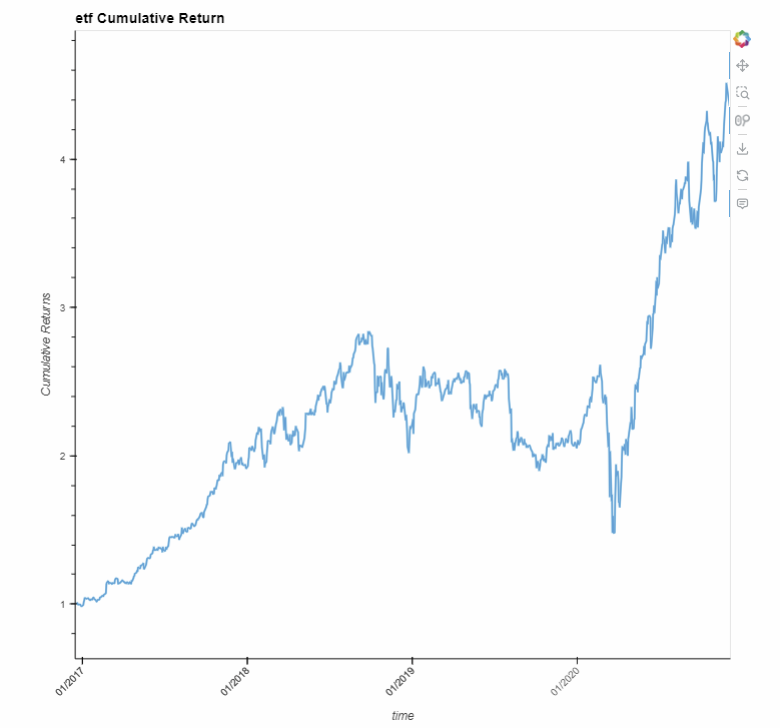